# Diskrete Fourier Transformation

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

## Implementierung nach Formel

([siehe engl. Wiki](https://en.wikipedia.org/wiki/Discrete_Fourier_transform))

Die diskrete Fourier Transformation transformiert eine Sequenz mit $N$ komplexen Zahlen $\left\{ \mathbf{x}_n \right\} := x_0, x_1, \ldots , x_{N - 1}$ in eine andere Sequenz aus komplexen Zahlen, $\left\{ \mathbf{X}_k \right\} := X_0, X_1, \ldots , X_{N - 1}$, wie folgt:

${ \begin{aligned} X_{k} &= \sum_{n = 0}^{N - 1} x_n \cdot e^{-i 2 \pi \frac{n}{N} k} \\ &= \sum_{n = 0}^{N - 1} x_n \cdot \left[ \cos \left( 2 \pi \frac{n}{N} k \right) - i \cdot \sin \left( 2 \pi \frac{n}{N} k \right) \right], \end{aligned} }$


In [2]:
def calc_dft(x):
    
    N = len(x)
    n = np.arange(N)
    X = np.zeros(N, dtype=complex)
    
    for k in range(N):
        X[k] = np.sum(x * np.exp(-1j * 2 * np.pi * n * k / N))
    
    return X

## DFT Anwendungsbeispiele

$k$ sind die Frequenz-Indizes, geben also nicht die physikalischen Frequenzen der jeweiligen Bins an. Um die entsprechende Frequenz $f$ zu jedem $k$ zu berechnen:

$f = \dfrac{k \cdot sr}{N}$ 

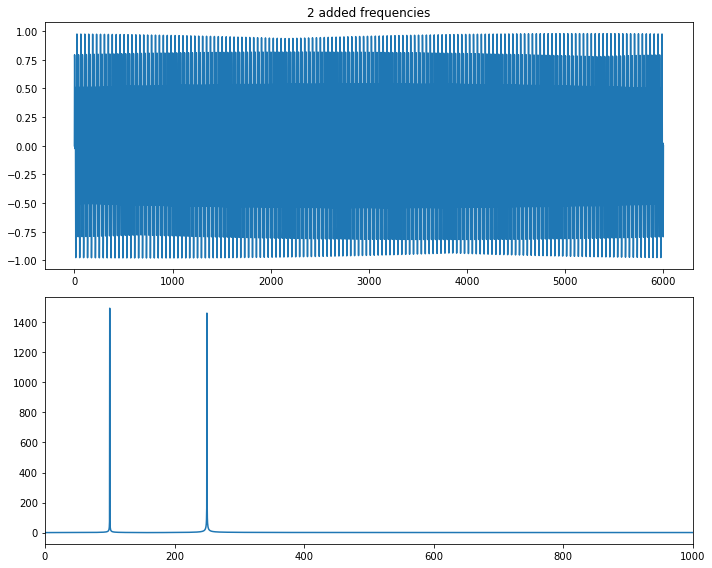

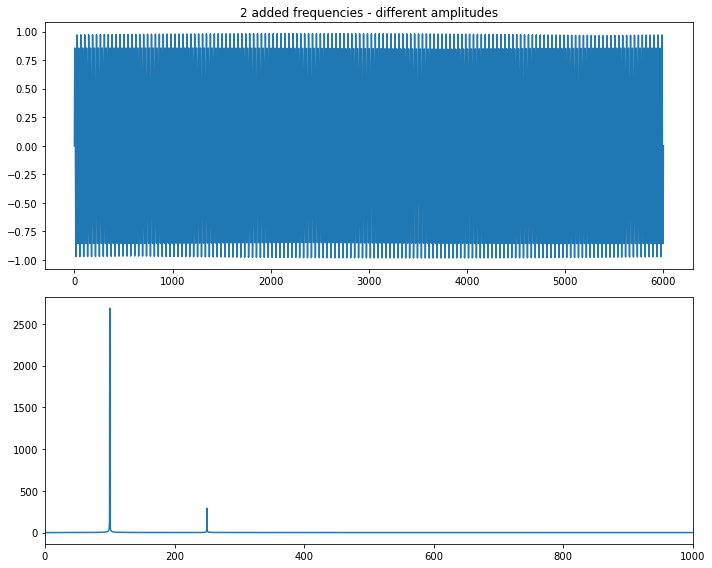

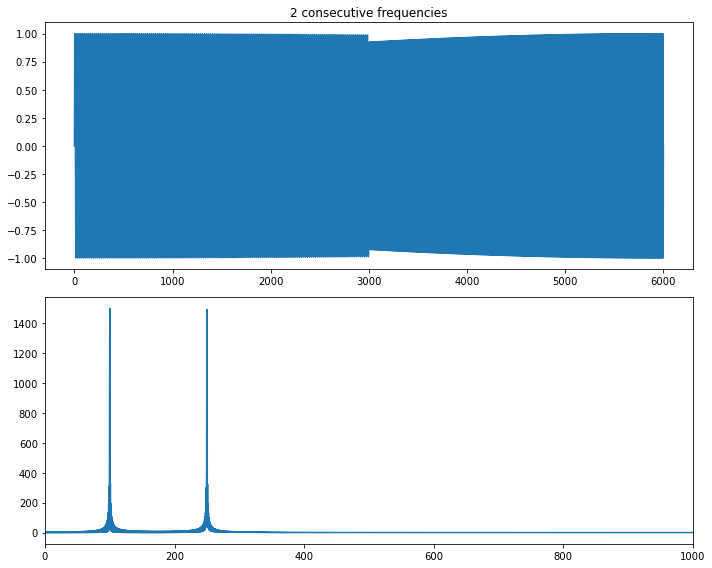

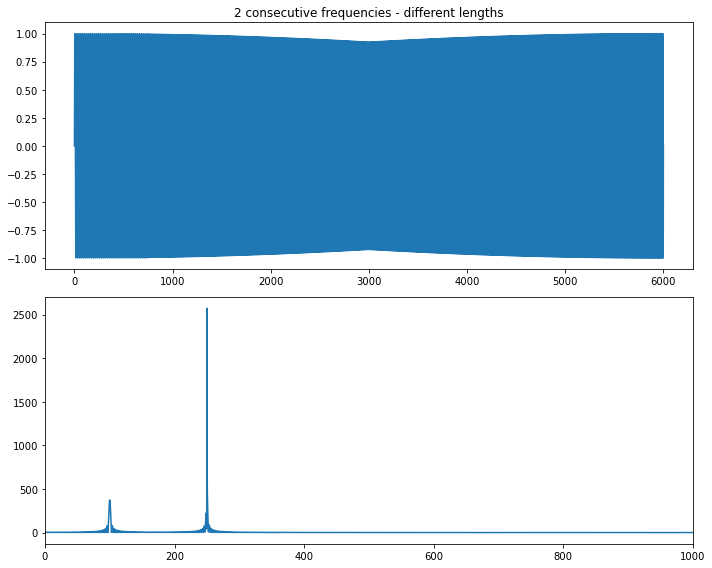

In [3]:
sr = 2000
freq1, freq2 = 100, 250
length = 3
t = np.linspace(0, length, sr * length)

xs = np.zeros((4, len(t)))

xs[0, :] = (np.sin(t * 2 * np.pi * freq1) * 0.5) + \
           (np.sin(t * 2 * np.pi * freq2) * 0.5)

xs[1, :] = (np.sin(t * 2 * np.pi * freq1) * 0.9) + \
           (np.sin(t * 2 * np.pi * freq2) * 0.1)

xs[2, :] = np.concatenate([
               (np.sin(t[:sr * length // 2] * 2 * np.pi * freq1)), \
               (np.sin(t[sr * length // 2:] * 2 * np.pi * freq2))])

xs[3, :] = np.concatenate([
               (np.sin(t[:sr * length // 8] * 2 * np.pi * freq1)), \
               (np.sin(t[sr * length // 8:] * 2 * np.pi * freq2))])

titles = ['2 added frequencies',
          '2 added frequencies - different amplitudes',
          '2 consecutive frequencies',
          '2 consecutive frequencies - different lengths']

for x_idx in range(xs.shape[0]):
    
    x = xs[x_idx, :]

    display(Audio(x, rate=sr))

    dft = calc_dft(x)

    N = len(x)
    k = np.arange(N)
    f = k * sr / N

    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    plt.title(titles[x_idx])
    plt.plot(x)
    
    plt.subplot(2, 1, 2)
    plt.plot(f, np.abs(dft))
    plt.xlim(0, sr / 2)
    
    plt.tight_layout()
    plt.show()

## DFT-Matrix

siehe [numpy: newaxis](/topics/numpy.md#newaxis)

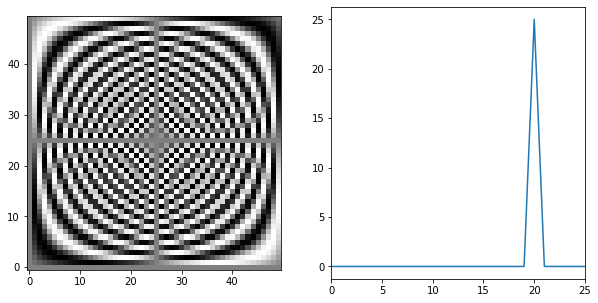

In [4]:
length = 1
sr = 50
N = int(length * sr)

n = np.arange(N)
k = np.copy(n)

x = np.sin(n / N * 2 * np.pi * 20)



exp_matr = np.exp(-1j * 2 * np.pi * n / N * k[:, np.newaxis])
prod_matr = x * exp_matr

dft = np.sum(prod_matr, axis=1)



plt.figure(figsize=(5 * 2, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.imag(exp_matr), origin='lower', cmap='gray')

plt.subplot(1, 2, 2)
plt.plot(np.abs(dft))
plt.xlim(0, sr / 2)

plt.show()

## Resources
1. 